# Sumário
<a id='sumario'></a>
- [sumario](#sumario)  
- [1 Carregando](#carregando)  
    
- [2 análise exploratória dos dados (AED)](#tratando)  
  - [2.1 ausente?](#ausente)  
  - [2.2 média ](#media )  
  - [2.3 histogramas ](#adicionando)  
  - [2.4 matriz de correlação ](#matriz)    

- [3  modelo](#analisando)  
  - [3.1 Divir os dados ](#dividir)  
  - [3.2 Treinar 1regressão logística 2floresta aleatória](#treinar)  
  - [3.3 Avaliar acurácia, precisão e sensibilidade para ambos os modelos](#avaliar)  
  - [3.4 Qual modelo rendeu melhores resultados?](#comparar)  
  - [3.5 conclusoes parciais](#conclusoes_parciais)  

  
- [4 agrupamentos de clientes](#agrupamento)  
    - [4.1 Padronizando ](#Padronizando)  
    - [4.2 dendrograma com linkage](#linkage)  
    - [4.3 estimar o número de agrupamentos destacavel](#número_destacavel)  
    - [4.4 K-means n=5 ](#K-means ) 
    - [4.5 valores que chamam atenção](#atencao)  
    - [4.6 distribuições de características para os agrupamentos](#distribuicao_caracteristicas)  
    - [4.7 taxa de rotatividade para cada agrupamento groupby](#rotatividade) 
    - [4.8 diferenças de rotatividade melhores e piores](#diferenças) 
        
    
- [5 conclusões e faça recomendações básicas sobre trabalhar com clientes](#conclusoes)  
    

<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">comentarios explicativos</span>

<span style="background-color:#E0E0FF; color:#0000CC">formato das conclusões sobre as analises realizadas,  

 <span style=" color:green">formato de teorias explicativas dos dados</span></span>


[sumario](#sumario)
##  Carregando <a id='carregando'></a>

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">caminho local e online:</span>


In [13]:

caminho='/datasets/gym_churn_us.csv'
caminho2='gym_churn_us.csv'

try:

    df = pd.read_csv(caminho)
except:
    df = pd.read_csv(caminho2)


<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">aqui temos o que significa cada coluna:  
 -	'Churn' — a rotatividade do mês em questão  
</span>
<details>
<summary>
    <b>*Dados do mês anterior ↓*</b>
    
</summary>
<font color="gray"> 
      
    
<font color="green">'gender'  </font>
    
<font color="green">'Near_Location'</font>  se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
    
<font color="green">'Partner'</font>  se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários)  
    
<font color="green">Promo_friends </font>se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação)  
    
<font color="green">'Phone'</font>  se o usuário fornece o seu número de telefone  
    
<font color="green">'age'</font> (idade)    
    
<font color="green">'Lifetime'</font>  o tempo (em meses) desde a primeira vez que o cliente veio à academia        
</font>
    
</details>
<details>
<summary>
    <b>*Dados do log de frequência e compras e dados sobre status de filiação atual   ↓*</b>
</summary>
<font color="gray">
  
    
<font color="green">'Contract_period'</font>  1 mês, 3 meses, 6 meses, ou um ano  
    
    
<font color="green">'Month_to_end_contract'</font>  os meses remanescentes até que o contrato expira  
    
<font color="green">'Group_visits'</font>  se o cliente participa de sessões em grupo  

<font color="green">'Avg_class_frequency_total'</font>  frequência média de idas por semana por toda a vida do cliente 

<font color="green">'Avg_class_frequency_current_month'</font>  frequência média de visitas por semana durante o mês corrente  

<font color="green">'Avg_additional_charges_total'</font>  a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.  
</font>
</details>




<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">aqui descobrimos a porcentagem de desistentes(26%) a quantidade de linhas e colunas:</span>


In [14]:
(df['Churn'].value_counts()/4000)*100

Churn
0    73.475
1    26.525
Name: count, dtype: float64

In [15]:
df.shape

(4000, 14)

In [16]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

### renomeando colunas <a id='renomear'></a>


<div style="background-color:#FFFFFF; color:#005566; font-size: 110%;">logo iremos analizar os dados das caracteristicas, para tanto, é necessário entender o que cada coluna significa, portanto também é de bom tom a renomearmos para que a analise fique mais intuitiva.  
</div>
  
  
<div style="background-color:#FFFFFF; color:#005566; font-size: 110%;">A seguir as colunas originais, as descrições e o codigo para alterá-las e fazer os graficos:</div>


<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">a descrição das colunas:  </span>  
**'Churn' — nosso Objetivo, que é a rotatividade de desistencia do mês em questão**
</span>
<details>
<summary>
    <b>*Dados do mês anterior ↓*</b>
    
</summary>
<font color="gray"> 
      
    
<font color="green">'gender'  </font>
    
<font color="green">'Near_Location'</font>  se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
    
<font color="green">'Partner'</font>  se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários)  
    
<font color="green">Promo_friends </font>se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação)  
    
<font color="green">'Phone'</font>  se o usuário fornece o seu número de telefone  
    
<font color="green">'age'</font> (idade)    
    
<font color="green">'Lifetime'</font>  o tempo (em meses) desde a primeira vez que o cliente veio à academia        
</font>
    
</details>
<details>
<summary>
    <b>*Dados do log de frequência e compras e dados sobre status de filiação atual   ↓*</b>
</summary>
<font color="gray">
  
    
<font color="green">'Contract_period'</font>  1 mês, 3 meses, 6 meses, ou um ano  
    
    
<font color="green">'Month_to_end_contract'</font>  os meses remanescentes até que o contrato expira  
    
<font color="green">'Group_visits'</font>  se o cliente participa de sessões em grupo  

<font color="green">'Avg_class_frequency_total'</font>  frequência média de idas por semana por toda a vida do cliente 

<font color="green">'Avg_class_frequency_current_month'</font>  frequência média de visitas por semana durante o mês corrente  

<font color="green">'Avg_additional_charges_total'</font>  a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.  
</font>
</details>




In [17]:
#passando para minusculo
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [18]:
# mudando para nomes mais intuitivos
novos_nomes = {'age':'idade',
               'lifetime':'tempo_de_academia',
               'month_to_end_contract': 'meses_restantes',
               'contract_period': 'periodo_contratado',
               'promo_friends': 'amigo_indicou',
               'avg_class_frequency_current_month': 'frequencia_mes',
               'group_visits': 'faz_aulas_grupais',
               'gender':'genero',
               'near_location':'proximidade',
               'partner':'parceria_empresa',
               'phone':'telefone',
               'Group_visits':'aulas_grupais',
               'avg_class_frequency_total':'frequencia',
               'avg_additional_charges_total':'gastos_extras_media',
               'churn':'saiu'
              }
df = df.rename(columns=novos_nomes)
df

,genero,proximidade,parceria_empresa,amigo_indicou,telefone,periodo_contratado,faz_aulas_grupais,idade,gastos_extras_media,meses_restantes,tempo_de_academia,frequencia,frequencia_mes,saiu
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


- ## análise exploratória dos dados <a id='tratando'></a>  

Nesta seção se busca:
- verificar se a tabela contém alguma característica ausente;  
- Analisar a média de valores e desvio padrão (com describe());  
- Analisar média dos valores médios das características em dois grupos: para aqueles que ficaram;  
- Desenhar histogramas de barra e distribuições de características para aqueles que saíram (rotatividade) e aqueles que ficaram;  
- Fazer uma matriz de correlação .


- ### Verificação de características ausentes: <a id='ausente'></a>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   genero               4000 non-null   int64  
 1   proximidade          4000 non-null   int64  
 2   parceria_empresa     4000 non-null   int64  
 3   amigo_indicou        4000 non-null   int64  
 4   telefone             4000 non-null   int64  
 5   periodo_contratado   4000 non-null   int64  
 6   faz_aulas_grupais    4000 non-null   int64  
 7   idade                4000 non-null   int64  
 8   gastos_extras_media  4000 non-null   float64
 9   meses_restantes      4000 non-null   float64
 10  tempo_de_academia    4000 non-null   int64  
 11  frequencia           4000 non-null   float64
 12  frequencia_mes       4000 non-null   float64
 13  saiu                 4000 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;">nada ausente</span>


In [20]:
df.duplicated().sum()

0

<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;"> 0 linhas duplicadas
</span>

- ### Analise da média de valores e desvio padrão <a id="media"></a>

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
genero,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
proximidade,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
parceria_empresa,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
amigo_indicou,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
telefone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
periodo_contratado,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
faz_aulas_grupais,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
idade,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
gastos_extras_media,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
meses_restantes,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000



<span style="background-color:#E0E0FF; color:#0000CC">temos escalas diferentes, principalmente na coluna *Avg_additional_charges_total e Age*</span>


<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;"> agora dividimos a 'média dos valores médios das características' em dois grupos: os que desistiram e os que ficaram.
</span>

df.groupby('saiu').mean().T


<span style="background-color:#E0E0FF; color:#0000CC">destaco  
    *tempo_de_academia,   
    meses_restantes,  
    periodo_contratado,    
    amigo_indicou,  
    frequencia_mes,
    faz_aulas_grupais*  
    todos eles possuem **forte** impacto na previsão de desistencia do cliente</span>


<span style="background-color:#E0E0FF">ja as medições: 
do valor total gasto com outras coisas,  
da frequencia de ida a academia por toda a vida,  
de parceiria com empresas,  
da idade  
parecem ter impacto **mediano**
</span>


<span style="background-color:#E0E0FF; color:gray">por outro lado  
o genero,  
se a localizaçao é proxima,  
se a academia tem o telefone do cliente,  
 parecem impacto **muito fraco**.  

</span>

- ### Desenhando histogramas <a id="adicionando"></a>

<span style="background-color:#FFFFFF; color:#005566; font-size: 110%;"> histogramas de barra e distribuições de características para aqueles que saíram (rotatividade) e aqueles que ficaram. 
</span>


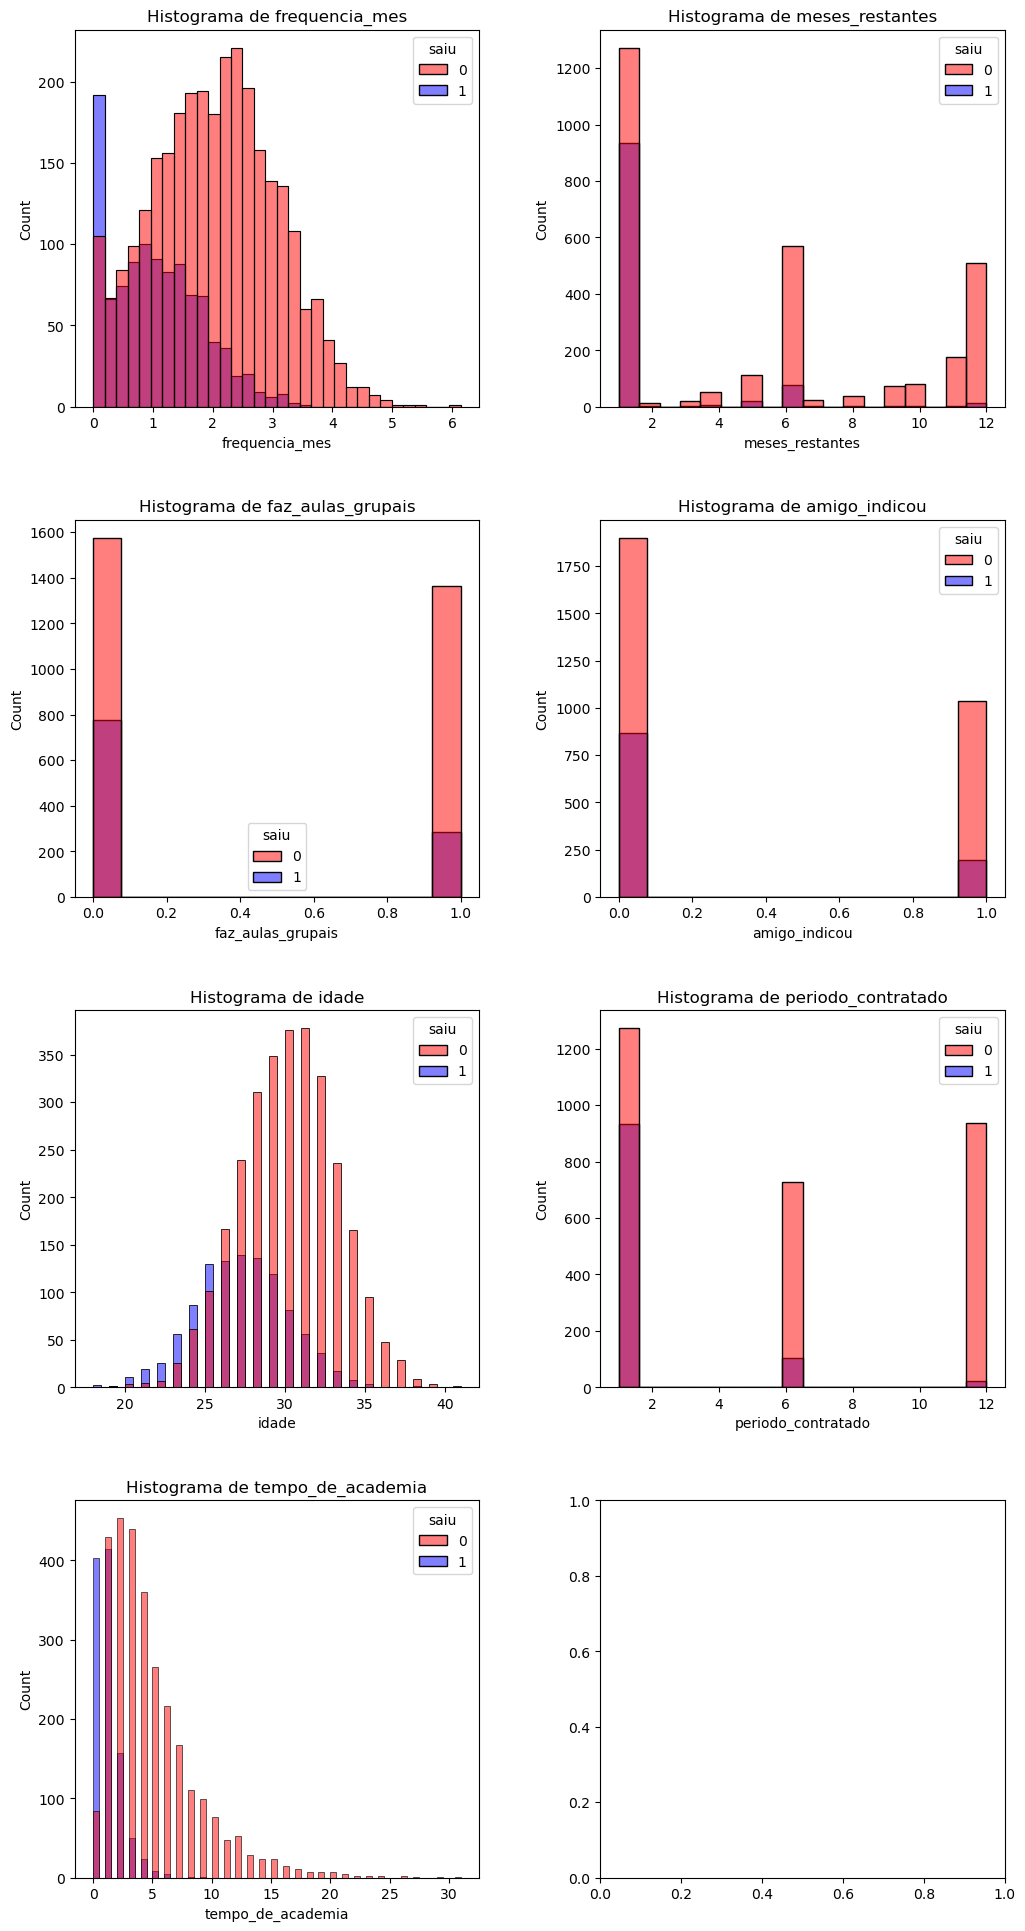

In [22]:

# destacando colunas:
colunas_imortantes = {'idade',
               'tempo_de_academia',
               'meses_restantes',
               'periodo_contratado',
               'amigo_indicou',
               'frequencia_mes',
               'faz_aulas_grupais'}


#contando o numero de colunas da figura que iremos plotar:
num_linhas = (len(colunas_imortantes) + 1) // 2

# criando subplots com duas colunas:
fig, axs = plt.subplots(num_linhas, 2, figsize=(12, 6 * num_linhas))

# Ajustar o layout dos subplots em 30%:
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# adotando cores contrastrantes -Vermelho vivo e Azul anil:
cores = ['#FF0000', '#0000FF']  

# Iterar sobre as colunas e os indices das colunas,
# enumerate pega os dois dados(i=indices, nomes= nomes das colunas)

for i, nomes in enumerate(colunas_imortantes):
    # Calcular as coordenadas do subplot atual
    linha = i // 2
    col = i % 2
    
    # Criar o histograma com o hue da coluna 'saiu'
    sns.histplot(data=df, x=df[nomes], hue='saiu', ax=axs[linha, col],palette=cores)
    
    # Adicionar título ao gráfico
    axs[linha, col].set_title(f'Histograma de {nomes}')

# Mostrar os gráficos
plt.show()

<span style="background-color:#E0E0FF; color:#0000CC"> percebe-se que os desistentes são em geral, mais jovens que os que ficam.  
    <span style= "color:green">Talvez estejam ainda procurando academias ou atividades fisicas de que gostem ou a que se adaptem, enquanto os mais experientes ja sabem bem o que querem</span> </span> 

<span style="background-color:#E0E0FF; color:green"> o padrão se repete e reforça a teoria anterior, pois os que malham a mais tempo dificilmente desistem e os que desistem quase todos malham a pouco tempo </span> 

<span style="background-color:#E0E0FF; color:#0000CC">conclusões:  
    Percebe-se que clientes se importam bastante nas multas por fidelidade, sendo a maioria dos desistentes aqueles cujo contrato já iria terminar proximo mês, ou cujo contrato não foi renovado.  
    A maioria dos desistentes contratam apenas um mês.  
    Proporcionalmente parece mais facil o cliente ficar se ele foi indicado por um amigo.  
    <span style= "color: green">Levanta-se a teoria de que a amizade influencia a permanencia, pois o amigo torna o exercicio mais prazeroso.    </span>  
    Nitidamente quase todos aqueles que vão cancelar já dão sinais, frequentando bem menos a academia do que aqueles que pretendem continuar.  
    Proporcionalmente os que fazem aulas grupais tendem a permanecer mais na academia, <span style= "color: green">o que reforça a teoria anterior </span>  
</span> 

<span style="background-color:#E0E0FF; color:#0000CC"> por fim é preocupante que a maioria dos que entraram na academia a pouco tempo desistem, mais preocupante ainda é que tem mais jovens abaixo de 25 anos desistindo do que persistindo.  
    <span style="background-color:#E0E0FF; color:green">Imagina-se que muitos vão a academia para experimentar, mas talvez haja algum problema com as primeiras impressões dos cliente, para que a retenção seja inferior a 50%</span> </span> 

- ### Fazendo matriz de correlação <a id="matriz"></a>

In [23]:
df.corr()['saiu'].sort_values()

tempo_de_academia     -0.438220
frequencia_mes        -0.412348
idade                 -0.404735
periodo_contratado    -0.389984
meses_restantes       -0.381393
frequencia            -0.249715
gastos_extras_media   -0.198697
faz_aulas_grupais     -0.175325
amigo_indicou         -0.162233
parceria_empresa      -0.157986
proximidade           -0.128098
telefone              -0.001177
genero                 0.000708
saiu                   1.000000
Name: saiu, dtype: float64

In [24]:
df_corr=df.corr().abs()
df_corr

,genero,proximidade,parceria_empresa,amigo_indicou,telefone,periodo_contratado,faz_aulas_grupais,idade,gastos_extras_media,meses_restantes,tempo_de_academia,frequencia,frequencia_mes,saiu
genero,1.000000,0.006699,0.010463,0.005033,0.008542,0.000502,0.017879,0.013807,0.009334,0.001281,0.013579,0.014620,0.009156,0.000708
proximidade,0.006699,1.000000,0.005119,0.210964,0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,0.128098
parceria_empresa,0.010463,0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,0.157986
amigo_indicou,0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,0.162233
telefone,0.008542,0.015763,0.009970,0.001982,1.000000,0.006893,0.010099,0.011403,0.009279,0.011196,0.018801,0.008340,0.013375,0.001177
periodo_contratado,0.000502,0.150233,0.306166,0.244552,0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,0.389984
faz_aulas_grupais,0.017879,0.154728,0.022710,0.120170,0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,0.175325
idade,0.013807,0.058358,0.047480,0.050113,0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,0.404735
gastos_extras_media,0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,0.198697
meses_restantes,0.001281,0.143961,0.294632,0.239553,0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,0.381393


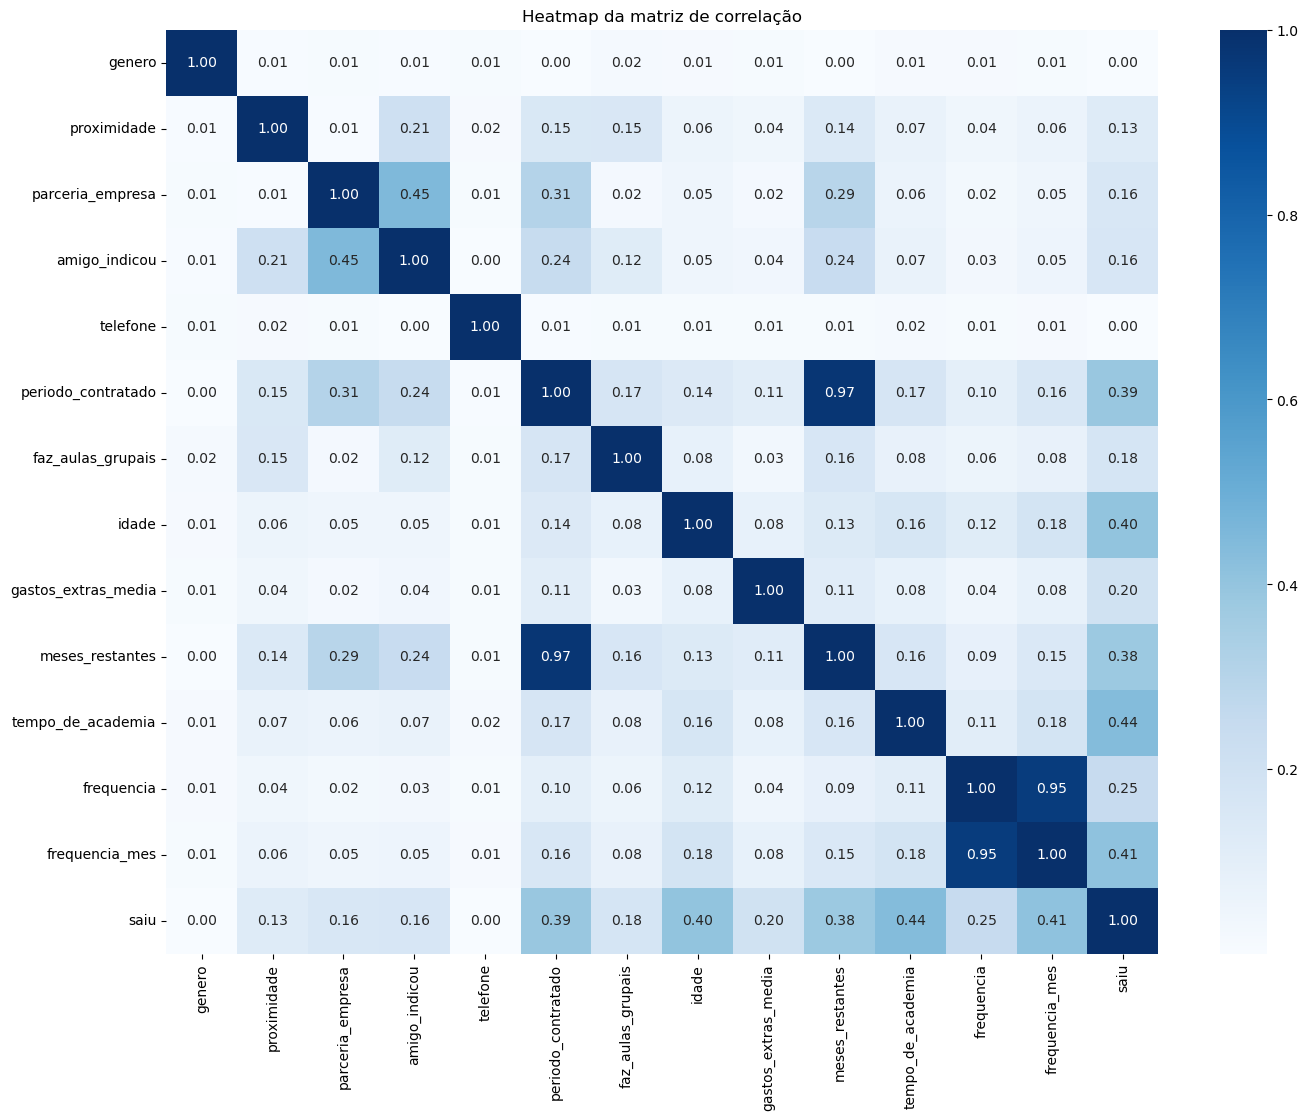

In [25]:
plt.figure(figsize=(16, 12))

# Gerando o heatmap
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

# Adicionando título ao gráfico
plt.title('Heatmap da matriz de correlação')

# Exibindo o gráfico
plt.show()

<span style="background-color:#E0E0FF; color:#0000CC">Como esperado,periodo contratado, idade, meses restantes, tempo de academia e frequencia no mes são os valores com maior correlação linear com Churn(saiu)

 - [sumario](#sumario)  
 ## modelo <a id='analisando'></a>

-	regressão logística
-	floresta aleatória


randon_state= 42 por sugestão

- ### Divir os dados <a id="dividir"></a>

In [26]:
X= df.drop('saiu', axis=1)
y=df['saiu']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

- ### Treinar 1regressão logística 2floresta aleatória <a id="treinar"></a>

In [27]:
#é necessário padronizar os dados para a regressão logistica, caso contrário alguns dados podem ser mal avaliados
sc=StandardScaler()
x_train_scaler=sc.fit_transform(X_train)
x_test_scaler=sc.transform(X_test)
X_scaler=sc.fit_transform(X)

In [28]:
modelo_regressao=LogisticRegression(max_iter=1000,random_state=42)
modelo_floresta= RandomForestClassifier(random_state=42) 
modelo_regressao.fit(x_train_scaler,y_train)
modelo_floresta.fit(x_train_scaler,y_train)

RandomForestClassifier(random_state=42)

- ### Avaliar acurácia, precisão e sensibilidade para ambos os modelos <a id="avaliar"></a>

In [29]:
previsao_logica= modelo_regressao.predict(x_test_scaler)
previsao_floresta=modelo_floresta.predict(x_test_scaler)
y_logico=previsao_logica
y_floresta=previsao_floresta

def calcular_metricas(y_real,previsao,nomemodelo):
    metricas = {'acuracia': accuracy_score, 'precisao': precision_score, 'sensibilidade': recall_score}
    print(nomemodelo)
    for nome, metrica in metricas.items():

        valor=metrica(y_real, previsao)
        print('-',nome, ':',valor)           

calcular_metricas(y_test,previsao_logica,'modelo logico')
print()
calcular_metricas(y_test,previsao_floresta,'modelo floresta')

modelo logico
- acuracia : 0.925
- precisao : 0.8763250883392226
- sensibilidade : 0.8184818481848185

modelo floresta
- acuracia : 0.9141666666666667
- precisao : 0.8623188405797102
- sensibilidade : 0.7854785478547854


- ### Qual modelo rendeu melhores resultados? <a id="comparar"></a>

<span style="background-color:#E0E0FF; color:#0000CC"> 
    <p style="background-color:#E0E0FF; color:#0000CC"> Dado o contexto em que um falso negativo é mais problemático do que um falso positivo, pois perder clientes é muito pior que dar mais atenção a um cliente que não estava propenso a desistir, devemos considerar a métrica de sensibilidade (também conhecida como recall) como a mais importante para a avaliação dos modelos. </p>
    <p style="background-color:#E0E0FF; color:#0000CC"> Ao analisar as métricas fornecidas, o modelo lógico apresenta uma sensibilidade mais alta (81.84%), em comparação com o modelo floresta (78.54%). Isso significa que o modelo lógico é mais eficaz em identificar verdadeiros positivos (pessoas propensas a desistir) do que o modelo floresta. </p>
</span>



 - [sumario](#sumario)  
## agrupamentos de clientes <a id="agrupamento"></a>

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram


from sklearn.cluster import KMeans


- ### Padronizando <a id="Padronizando"></a>

<div style= "color:#0000CC">
    O seguinte codigo escrito na seção anterior padronizou os dados: 
    
sc=StandardScaler()        
x_train_scaler=sc.fit_transform(X_train)  
x_test_scaler=sc.transform(X_test)  
X_scaler=sc.fit_transform(X)  
</div>

In [31]:
print(X_train.shape)
print(x_test_scaler.shape)
print(X_scaler.shape)


(2800, 13)
(1200, 13)
(4000, 13)


In [32]:
dfscaler=pd.DataFrame(X_scaler, columns=X.columns)

In [33]:
dfscaler.describe().T

,count,mean,std,min,25%,50%,75%,max
genero,4000.0,7.771561e-17,1.000125,-1.020715,-1.020715,0.979706,0.979706,0.979706
proximidade,4000.0,1.847411e-16,1.000125,-2.337100,0.427881,0.427881,0.427881,0.427881
parceria_empresa,4000.0,-4.440892e-17,1.000125,-0.973842,-0.973842,-0.973842,1.026861,1.026861
amigo_indicou,4000.0,-6.927792e-17,1.000125,-0.667931,-0.667931,-0.667931,1.497161,1.497161
telefone,4000.0,1.092459e-16,1.000125,-3.059852,0.326813,0.326813,0.326813,0.326813
periodo_contratado,4000.0,-5.373479e-17,1.000125,-0.809219,-0.809219,-0.809219,0.289890,1.608822
faz_aulas_grupais,4000.0,-8.171241e-17,1.000125,-0.837498,-0.837498,-0.837498,1.194032,1.194032
idade,4000.0,4.014566e-16,1.000125,-3.432900,-0.670435,-0.056554,0.557327,3.626733
gastos_extras_media,4000.0,-5.329071e-17,1.000125,-1.523667,-0.810380,-0.111306,0.664351,4.210422
meses_restantes,4000.0,-8.881784e-18,1.000125,-0.792873,-0.792873,-0.792873,0.400224,1.831941


- ### dendrograma com linkage <a id="linkage"></a>

In [34]:
# x_train_scaler
# x_test_scaler

linked = linkage(X_scaler, method = 'ward')
#A variável linked armazena a tabela com objetos vinculados. Ele pode ser visualizado como um dendrograma:




#o dendograma pode levar um tempo para ser renderizado
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show()

- ### estimar o número de agrupamentos destacavel <a id="número_destacavel"></a>

<span style="background-color:#E0E0FF; color:#0000CC"> 
claramente temos a possibilidade de dividir entre 4 e 10 grandes grupos, então optaremos por 5

- ### K-means n=5 <a id="K-means"></a>

In [35]:
Km = KMeans(n_clusters=5,random_state=42)
grupos = Km.fit_predict(X_scaler)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
grupos

array([2, 1, 3, ..., 1, 2, 1])

In [37]:
df['grupo']=grupos
df

,genero,proximidade,parceria_empresa,amigo_indicou,telefone,periodo_contratado,faz_aulas_grupais,idade,gastos_extras_media,meses_restantes,tempo_de_academia,frequencia,frequencia_mes,saiu,grupo
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,1
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,1
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,2


- ### valores que chamam atenção <a id="atencao"></a>

In [38]:
todas_colunas=df.columns
for coluna in todas_colunas:
    print(coluna)
    print(df.groupby('grupo')[coluna].describe().T)

genero
grupo           0           1           2            3           4
count  544.000000  936.000000  646.000000  1107.000000  767.000000
mean     0.496324    0.498932    0.486068     0.488708    0.585398
std      0.500447    0.500266    0.500193     0.500098    0.492975
min      0.000000    0.000000    0.000000     0.000000    0.000000
25%      0.000000    0.000000    0.000000     0.000000    0.000000
50%      0.000000    0.000000    0.000000     0.000000    1.000000
75%      1.000000    1.000000    1.000000     1.000000    1.000000
max      1.000000    1.000000    1.000000     1.000000    1.000000
proximidade
grupo      0           1           2       3           4
count  544.0  936.000000  646.000000  1107.0  767.000000
mean     0.0    0.944444    0.998452     1.0    0.971317
std      0.0    0.229184    0.039344     0.0    0.167023
min      0.0    0.000000    0.000000     1.0    0.000000
25%      0.0    1.000000    1.000000     1.0    1.000000
50%      0.0    1.000000    1.000000

In [39]:

df.groupby('grupo').mean().sort_values(by='saiu')

,genero,proximidade,parceria_empresa,amigo_indicou,telefone,periodo_contratado,faz_aulas_grupais,idade,gastos_extras_media,meses_restantes,tempo_de_academia,frequencia,frequencia_mes,saiu
grupo,,,,,,,,,,,,,,
1,0.498932,0.944444,0.740385,0.485043,0.900641,11.884615,0.551282,29.931624,164.625700,10.877137,4.674145,1.999110,1.990516,0.022436
4,0.585398,0.971317,0.259452,0.089961,0.903520,2.809648,0.477184,30.142112,161.875250,2.588005,5.147327,2.880231,2.881432,0.069100
2,0.486068,0.998452,0.823529,1.000000,0.899381,3.165635,0.456656,29.224458,141.868789,2.927245,3.739938,1.742540,1.636485,0.246130
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
3,0.488708,1.000000,0.242999,0.020777,0.902439,1.986450,0.320687,28.209575,131.151639,1.902439,2.391147,1.272203,1.029702,0.526649


<span style="background-color:#E0E0FF; color:#0000CC"> 
chamam atenção os meses restantes e o preiodo contratado a frequencia e indicações de amigos

- ### distribuições de características para os agrupamentos <a id="distribuicao_caracteristicas"></a>

<span style="background-color:#E0E0FF; color:#0000CC"> percebemos que o algoritimo priorizou Meses_restantes e Periodo_contratado para o grupo de menor desistência.  
Para o de maior desistencia, foi priorizado que além de não ter as caracteristicas do de menor desistencia, a frequencia do mes é baixa demais e praticamente não houve indicação de amigo, o periodo contratado é baixo bem como os meses restantes de contrato e eles não fazem aulas grupais.  
    O tempo de academia é gradualmente menor a medida que o grupo aumenta a desistencia.  
    O grupo 4 é o grupo dos que não deixaram telefone.
    </span>

- ### taxa de rotatividade para cada agrupamento groupby <a id="rotatividade"></a>

In [40]:
df.groupby('grupo')['saiu'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
1,936.0,0.022436,0.148176,0.0,0.0,0.0,0.0,1.0
4,767.0,0.069100,0.253790,0.0,0.0,0.0,0.0,1.0
2,646.0,0.246130,0.431089,0.0,0.0,0.0,0.0,1.0
0,544.0,0.450368,0.497988,0.0,0.0,0.0,1.0,1.0
3,1107.0,0.526649,0.499515,0.0,0.0,1.0,1.0,1.0


- ### diferenças de rotatividade melhores e piores <a id="diferenças"></a>

<span style="background-color:#E0E0FF; color:#0000CC"> 
    Temos que o grupo  de maiores taxas de desistentes é também o maior grupo,   
    Os demais grupos possuem taxas de desistencia abaixo de 30%.  
    O grupo segundo em desistencias e também o menor grupo.  
    Os dois melhores grupos são de clientes muito fieis, que muito dificilmente iriam desistir.  
    Os dois somam pouco quase de 1800 pessoas.  
    No geral a preocupação maior deve ser com unico grupo de desistencias acima de 50%, pois se destaca ante os demais.  
    Referido grupo possui caracteristicas de: baixa frequencia no mes e praticamente não houve indicações de amigos, pouco tempo de academia, planos curtos (muitos mensais), poucos meses de contrato sobrando e pouca frequencia em geral a academia. </span>

<span style="background-color:#E0E0FF; color:green"> Não sei como foram coletados os dados, pois é possivel que tenham sido contados como não frequentados os dias **posteriores** à desistência da academia, porém pertencentes ao mesmo mês de desistência. O certo seria registrar a frequencia e faltas apenas anterior ao candelamento da academia. Se a coleta foi feita corretamente, então temos um forte indicador de que o cliente está propenso a desistir da academia.

In [41]:
mapeamento = {2:1, 1: 2, 0: 3, 4: 4, 3: 5}
df_ordenado=df
# Substituir os valores na coluna 'grupo'
df_ordenado['grupo'] = df['grupo'].replace(mapeamento)

# Gerar a tabela com os valores atualizados
tabela_atualizada = df_ordenado.groupby('grupo')['saiu'].describe().sort_values(by='mean')

# Imprimir a tabela atualizada
print(tabela_atualizada)

        count      mean       std  min  25%  50%  75%  max
grupo                                                     
2       936.0  0.022436  0.148176  0.0  0.0  0.0  0.0  1.0
4       767.0  0.069100  0.253790  0.0  0.0  0.0  0.0  1.0
1       646.0  0.246130  0.431089  0.0  0.0  0.0  0.0  1.0
3       544.0  0.450368  0.497988  0.0  0.0  0.0  1.0  1.0
5      1107.0  0.526649  0.499515  0.0  0.0  1.0  1.0  1.0


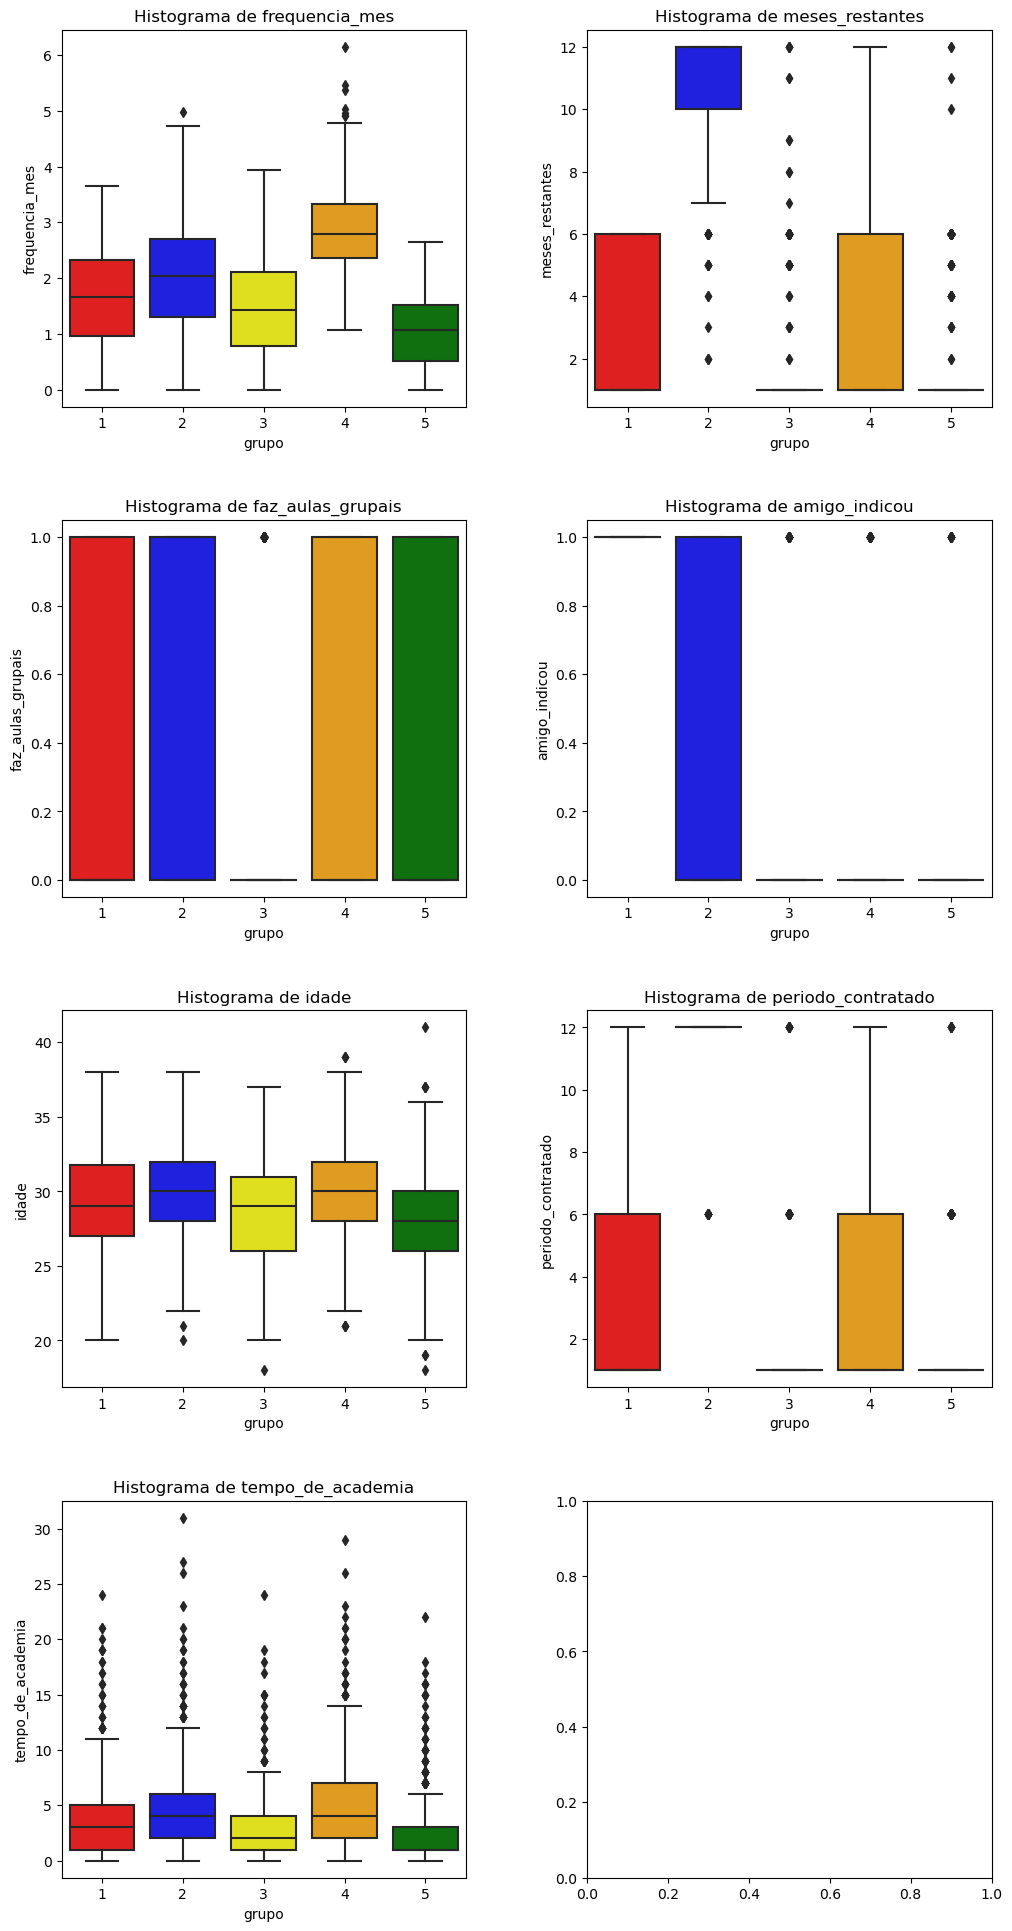

In [42]:
num_linhas = (len(colunas_imortantes) + 1) // 2

# criando subplots com duas colunas:
fig, axs = plt.subplots(num_linhas, 2, figsize=(12, 6 * num_linhas))

# Ajustar o layout dos subplots em 30%:
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# adotando cores contrastrantes -Vermelho vivo e Azul anil:
cores = ['#FF0000', '#0000FF', '#FFFF00', '#FFA500', '#008000']

# Iterar sobre as colunas e os indices das colunas,
# enumerate pega os dois dados(colunas e indices), .items() pega os dados da chave e do valor do dicionario
# as chaves são os nomes antigos e os valores sao os nomes novos das colunas:

for i, nomes in enumerate(colunas_imortantes):
    # Calcular as coordenadas do subplot atual
    linha = i // 2
    col = i % 2
    
    # Criar o histograma com o hue da coluna 'saiu'
    sns.boxplot(data=df_ordenado, y=df_ordenado[nomes], x='grupo', ax=axs[linha, col], palette=cores)
    
    # Adicionar título ao gráfico
    axs[linha, col].set_title(f'Histograma de {nomes}')

# Mostrar os gráficos
plt.show()

 - [sumario](#sumario)  

 ## conclusões e recomendações básicas sobre trabalhar com clientes <a id="conclusoes"></a>

<span style="background-color:#E0E0FF; color:#0000CC">
<p>- Há fortes indícios de que se o cliente faltou muito nos últimos dias ele vai desistir. A maioria dos que faltaram o mês inteiro desistiu, nenhum dos que iam 4 ou mais vezes na semana desistiu</p>

<p>- Há fortes indícios de que clientes antigos tendem a ficar e os novos a desistirem, a maioria dos clientes com menos de um mês de academia desistiu, portanto é necessário dar atenção aos alunos novos, talvez eles estejam insatisfeitos, talvez não tenham sido devidamente orientados pelos instrutores, talvez se sentiram intimidados pelos colegas de academia. O certo é que políticas de bom acolhimento dos novos alunos devem ser adotadas urgentemente.</p>

<p>- Indicações de amigos ajudam bastante a fidelizar, assim como aulas grupais.  </p>
<p>- Aqueles que vieram por indicação são aproximadamente três vezes mais propensos a ficarem. É, portanto, proveitoso incentivar esse tipo de atitude, de indicar amigos, inclusive com promoções do tipo planos para grupos de dois ou mais clientes.</p>

<p>- No mesmo caminho, os que fazem aulas em grupo são duas vezes mais inclinados a permanecerem. Conclui-se que aulas grupais além de provavelmente atrair novos alunos, fidelizam os já matriculados. Diante disto, provavelmente é economicamente interessante fomentar amizades e exercicios em grupo dentro da academia.</p>

<p>- Planos anuais e semestrais ajudam a fidelizar o cliente: quase metade dos clientes de planos mensais desitem, enquanto que apenas uma parcela ínfima dos anuais acabam desistindo. Logo, promoções para esse tipo de plano mais longo podem ser muito benéficas à imagem e às finanças da empresa.</p>

<p>- A idade influencia razoavelmente na permanencia, tem mais jovens de 25 anos desistindo do que permanecendo na academia, enquanto que quase nenhum acima de 40 desiste da academia. Em razão disto, seria bom a academia adotar políticas para entender porque os jovens não estão permanecendo na academia, sugiro caixas de sujestões, aplicação de formularios, bem como orientar os instrutores a prestarem mais atenção nos jovens e conversarem com eles para entender o que estaria faltando na academia para efetivamente agradar a essa faixa etaria.</p>
</span>
